In [2]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np

In [3]:
divar_df = pd.read_csv('../../datasets/Divar.csv')

/tmp/ipykernel_543446/1197587432.py:1: DtypeWarning: Columns (11,27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  divar_df = pd.read_csv('../../datasets/Divar.csv')


In [4]:
gdf = gpd.read_file('./shapefiles/gadm41_IRN_2.shp')
gdf['city_slug'] = gdf['NAME_2'].apply(lambda x: x.lower())

geo_df = divar_df['city_slug'].value_counts().reset_index()
gdf = gdf.merge(geo_df, left_on='city_slug', right_on='city_slug', how='left')
gdf['count'] = gdf['count'].apply(lambda x: np.nan_to_num(x, nan=0.0))

<Figure size 2000x2000 with 0 Axes>

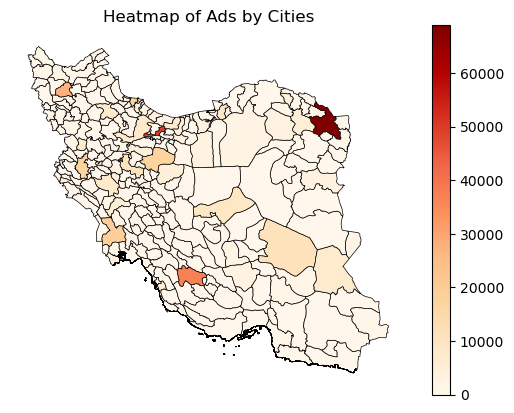

In [7]:
plt.figure(figsize=(20, 20))

gdf.plot(column='count', edgecolor='black', legend=True, cmap='OrRd', linewidth=0.5)
plt.title('Heatmap of Ads by Cities')
plt.axis('off')
plt.show()